# Práctica 6

Ahora es tu turno de trabajar con embeddings en distintos contextos.

## Ejercicio obligatorio (5 puntos)

El ejercicio que tenéis que realizar obligatoriamente consiste en elegir uno de los datasets del [UCI Machine learning repository](https://archive.ics.uci.edu/ml/datasets.php) y construir un modelo siguiendo las instrucciones proporcionadas en el notebook de instrucciones. La única restricción es que el dataset debe contener tanto datos numéricos como categóricos.

## Ejercicios opcionales
- Recupera lo que viste en la asignatura de aprendizaje automático II para construir modelos usando técnicas clásicas y compara el modelo que has creado en el ejercicio obligatorio con al menos los siguientes modelos KNN, SVM, Decision Tree y Random Forest. (2 puntos)
- En el notebook practica6Opcional.ipynb se incluye un notebook con varios ejercicios para trabajar con word embeddings. (3 puntos)


In [1]:
!pip install fastai -Uq

     |████████████████████████████████| 197 kB 4.2 MB/s 
     |████████████████████████████████| 60 kB 6.2 MB/s 


In [2]:
from fastai.tabular.all import *
import pandas as pd
import random

In [3]:
columns = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

In [4]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data -O data.csv

--2022-05-15 17:32:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 191873 (187K) [application/x-httpd-php]
Saving to: ‘data.csv’

data.csv            100%[===================>] 187.38K   473KB/s    in 0.4s    

2022-05-15 17:32:49 (473 KB/s) - ‘data.csv’ saved [191873/191873]



In [5]:
df = pd.read_csv('data.csv',header=None,names=columns)

In [48]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
from sklearn.model_selection import train_test_split

In [51]:
df["Rings"].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [54]:
def myfunc(x):
  if x >= 0 and x < 5:
    return("[1-4]")
  if x >=5  and x < 10:
    return("[5-9]")
  if x >=10 and x < 15:
    return("[10-14]")
  if x >=15 and x < 20:
    return("[15-19]")
  if x >=20 and x < 25:
    return("[20-24]")
  if x >=25 and x < 30:
    return("[25-29]")

In [57]:
df["Rings"] = df["Rings"].apply(myfunc)

In [58]:
df.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,[15-19]
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,[5-9]
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,[5-9]
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,[10-14]
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,[5-9]


In [59]:
df_train, df_test = train_test_split(df, test_size=0.2)

In [75]:
df_train.head(5)

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
3129,F,0.630,0.490,0.17,1.2155,0.4625,0.2045,0.3105,[10-14]
1608,I,0.545,0.400,0.13,0.6860,0.3285,0.1455,0.1800,[5-9]
2672,F,0.595,0.465,0.15,1.1005,0.5415,0.1660,0.2650,[5-9]
2689,M,0.645,0.515,0.16,1.1845,0.5060,0.3110,0.3350,[5-9]
2501,F,0.330,0.260,0.08,0.2000,0.0625,0.0500,0.0700,[5-9]


In [60]:
dep_var = 'Rings'

In [61]:
procs = [Categorify, FillMissing,Normalize]

In [62]:
cont,cat = cont_cat_split(df_train, 1, dep_var=dep_var)

In [63]:
cat

['Sex']

In [64]:
cont

['Length',
 'Diameter',
 'Height',
 'Whole weight',
 'Shucked weight',
 'Viscera weight',
 'Shell weight']

In [65]:
dlsTrain = TabularDataLoaders.from_df(df_train,'.',procs=procs,
                                cat_names=cat,cont_names=cont,y_names='Rings',
                                valid_idx=random.sample(range(0,len(df_train)),int(len(df_train)*0.2)),bs=64)

In [66]:
learn = tabular_learner(dlsTrain, layers=[500,250],metrics=[])

In [67]:
learn.model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(4, 3)
  )
  (emb_drop): Dropout(p=0.0, inplace=False)
  (bn_cont): BatchNorm1d(7, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): LinBnDrop(
      (0): Linear(in_features=10, out_features=500, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): LinBnDrop(
      (0): Linear(in_features=500, out_features=250, bias=False)
      (1): ReLU(inplace=True)
      (2): BatchNorm1d(250, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (2): LinBnDrop(
      (0): Linear(in_features=250, out_features=6, bias=True)
    )
  )
)

SuggestedLRs(valley=0.0006918309954926372)

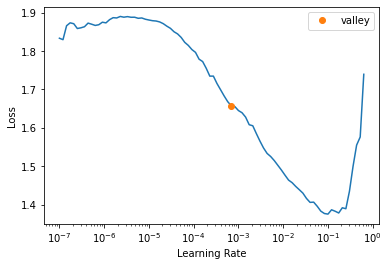

In [68]:
learn.lr_find()

In [69]:
learn.fit(10, 1e-3)

epoch,train_loss,valid_loss,time
0,1.114118,0.964084,00:00
1,0.999653,0.859335,00:02
2,0.924993,0.798582,00:00
3,0.864239,0.741586,00:06
4,0.818319,0.762344,00:01
5,0.766052,0.721625,00:00
6,0.735451,0.708419,00:01
7,0.716624,0.734644,00:02
8,0.694899,0.730859,00:00
9,0.684807,0.697328,00:02


In [70]:
dfAll = pd.concat([df_train,df_test])
dlsTest = TabularDataLoaders.from_df(dfAll,'.',procs=procs,
                                cat_names=cat,cont_names=cont,y_names='Rings',
                                valid_idx=list(range(len(df_train)+1,len(dfAll))),bs=64)

In [71]:
learn.dls=dlsTest

In [72]:
learn.validate()

(#1) [0.7002018690109253]

In [74]:
learn.predict(df_test.iloc[0][:-1])

(   Sex    Length  Diameter    Height  Whole weight  Shucked weight  \
 0  3.0  0.956587  1.071535 -1.401259      0.426609        0.690655   
 
    Viscera weight  Shell weight  Rings  
 0       -0.051072     -0.463008    5.0  ,
 tensor(5),
 tensor([0.0111, 0.1487, 0.0561, 0.0166, 0.0077, 0.7598]))

Al finalizar, recuerda guardar los cambios en GitHub utilizando la opción Archivo -> Guardar una copia en GitHub.
